### 1. Running ado.file
``freeshape`` reshapes wide data into long without requiring variables names of the variables to be shaped numbered stub. 

``labelcollapse`` preserves variable labeling while performing collapse.

In [1]:
qui do "https://raw.githubusercontent.com/worldbank/Stata-IE-Visual-Library/develop/Library/Scatter%20plots/Scatter%20plot%20of%20major%20outcome%20(mean%20variable%20value)%2C%20stratified%20by%20a%20variable/freeshape.ado"
qui do "https://raw.githubusercontent.com/worldbank/Stata-IE-Visual-Library/develop/Library/Scatter%20plots/Scatter%20plot%20of%20major%20outcome%20(mean%20variable%20value)%2C%20stratified%20by%20a%20variable/labelcollapse.ado"

### 2. Uploading data

In [2]:
use "https://github.com/worldbank/Stata-IE-Visual-Library/raw/develop/Library/Scatter%20plots/Scatter%20plot%20of%20major%20outcome%20(mean%20variable%20value)%2C%20stratified%20by%20a%20variable/data.dta", clear

### 3. Reshaping the data for the graph

In [3]:
labelcollapse	essential correct cxr sputum dstgx s5_referral sp_drugs_tb sp_drugs_antibio sp_drugs_quin, by(sp_case)
freeshape 		essential correct cxr sputum dstgx s5_referral sp_drugs_tb sp_drugs_antibio sp_drugs_quin, i(sp_case) j(var)

### 4. Assigning ordered number

In [4]:
local x = 1
qui gen order = 0
qui foreach name in 	essential correct cxr sputum dstgx s5_referral sp_drugs_tb sp_drugs_antibio sp_drugs_quin {
	replace order = `x' if var_name == "`name'"
	local ++x
	}

### 5. Creating the graph

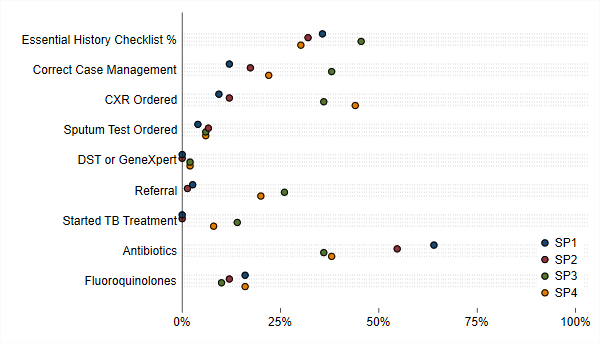

In [5]:
graph dot var_value , asy over(sp_case) over(var_label, sort(order)) linegap(20) graphregion(color(white)) xsize(7) legend(region(lc(none) fc(none))) ///
	yscale(noline) ytit("") ylab(0 "0%" .25 "25%" .5 "50%" .75 "75%" 1 "100%") ///
	linetype(line) lines( lp(.) lc(gs11)) legend(pos(5) ring(0) c(1)  region(lc(white) fc(white))) ///
	marker(1, m(O) mlcolor(black)) ///
	marker(2, m(O) mlcolor(black)) ///
	marker(3, m(O) mlcolor(black)) ///
	marker(4, m(O) mlcolor(black))

### 6. Exporting the graph

In [6]:
qui graph export "figure.png" , width(4000) replace